<a href="https://colab.research.google.com/github/Er-shivam11/datascienceproject/blob/main/sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi welcome to the new project.
In this project I Conducted sales analysis to identify trends in the demand for different types of vehicles such as which types of vintage vehicles are most popular in different regions, and what factors contribute to the success of sales.
Created a [dashboard](https://public.tableau.com/app/profile/shivam.nirmal/viz/salesanalysis_16783467610480/Dashboard1) in Tableau to visualize the results of the analysis like
total sales by product and region, which is a key metric to evaluate the performance of sales etc.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/sales.csv", encoding='cp1252')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.shape

(2823, 25)

In [ ]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [ ]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [ ]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
df = df.drop_duplicates()
df = df.dropna()

In [ ]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2667,10120,43,76.0,14,3268.00,4/29/2003 0:00,Shipped,2,4,2003,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
2673,10223,26,67.2,15,1747.20,2/20/2004 0:00,Shipped,1,2,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Small
2685,10361,44,100.0,10,5001.92,12/17/2004 0:00,Shipped,4,12,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium
2764,10361,35,100.0,11,4277.35,12/17/2004 0:00,Shipped,4,12,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium
2791,10361,23,95.2,12,2189.60,12/17/2004 0:00,Shipped,4,12,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small


In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,CONTACTFIRSTNAME,DEALSIZE
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,...,S10_1678,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,Peter,Medium
21,10361,20,72.55,13,1451.00,12/17/2004 0:00,Shipped,4,12,2004,...,S10_1678,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,Adrian,Small
40,10270,21,100.00,9,4905.39,7/19/2004 0:00,Shipped,3,7,2004,...,S10_1949,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,Adrian,Medium
47,10347,30,100.00,1,3944.70,11/29/2004 0:00,Shipped,4,11,2004,...,S10_1949,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,Peter,Medium
51,10391,24,100.00,4,2416.56,03-09-2005 00:00,Shipped,1,3,2005,...,S10_1949,"Anna's Decorations, Ltd",02 9936 8555,201 Miller Street,North Sydney,NSW,2060,Australia,Anna,Small


In [ ]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [ ]:
df.shape

(147, 22)

In [ ]:
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,CONTACTFIRSTNAME,DEALSIZE
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,...,S10_1678,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,Peter,Medium
21,10361,20,72.55,13,1451.00,12/17/2004 0:00,Shipped,4,12,2004,...,S10_1678,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,Adrian,Small
40,10270,21,100.00,9,4905.39,7/19/2004 0:00,Shipped,3,7,2004,...,S10_1949,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,Adrian,Medium
47,10347,30,100.00,1,3944.70,11/29/2004 0:00,Shipped,4,11,2004,...,S10_1949,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,Peter,Medium
51,10391,24,100.00,4,2416.56,03-09-2005 00:00,Shipped,1,3,2005,...,S10_1949,"Anna's Decorations, Ltd",02 9936 8555,201 Miller Street,North Sydney,NSW,2060,Australia,Anna,Small


now real analysis begin
Calculate total sales for each transaction


In [ ]:
df = df.rename(columns={'QUANTITYORDERED': 'QTYORDR'})
df.head()

,ORDERNUMBER,QTYORDR,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,CONTACTFIRSTNAME,DEALSIZE
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,...,S10_1678,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,Peter,Medium
21,10361,20,72.55,13,1451.00,12/17/2004 0:00,Shipped,4,12,2004,...,S10_1678,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,Adrian,Small
40,10270,21,100.00,9,4905.39,7/19/2004 0:00,Shipped,3,7,2004,...,S10_1949,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,Adrian,Medium
47,10347,30,100.00,1,3944.70,11/29/2004 0:00,Shipped,4,11,2004,...,S10_1949,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,Peter,Medium
51,10391,24,100.00,4,2416.56,03-09-2005 00:00,Shipped,1,3,2005,...,S10_1949,"Anna's Decorations, Ltd",02 9936 8555,201 Miller Street,North Sydney,NSW,2060,Australia,Anna,Small


In [ ]:
df['TOTAL_SALES'] = df['PRICEEACH'] * df['QTYORDR']
df.head()

,ORDERNUMBER,QTYORDR,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,CONTACTFIRSTNAME,DEALSIZE,TOTAL_SALES
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,...,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,Peter,Medium,3700.0
21,10361,20,72.55,13,1451.00,12/17/2004 0:00,Shipped,4,12,2004,...,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,Adrian,Small,1451.0
40,10270,21,100.00,9,4905.39,7/19/2004 0:00,Shipped,3,7,2004,...,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,Adrian,Medium,2100.0
47,10347,30,100.00,1,3944.70,11/29/2004 0:00,Shipped,4,11,2004,...,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,Peter,Medium,3000.0
51,10391,24,100.00,4,2416.56,03-09-2005 00:00,Shipped,1,3,2005,...,"Anna's Decorations, Ltd",02 9936 8555,201 Miller Street,North Sydney,NSW,2060,Australia,Anna,Small,2400.0


In [ ]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df.head()

,ORDERNUMBER,QTYORDR,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,CONTACTFIRSTNAME,DEALSIZE,TOTAL_SALES
10,10223,37,100.00,1,3965.66,2004-02-20,Shipped,1,2,2004,...,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,Peter,Medium,3700.0
21,10361,20,72.55,13,1451.00,2004-12-17,Shipped,4,12,2004,...,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,Adrian,Small,1451.0
40,10270,21,100.00,9,4905.39,2004-07-19,Shipped,3,7,2004,...,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,Adrian,Medium,2100.0
47,10347,30,100.00,1,3944.70,2004-11-29,Shipped,4,11,2004,...,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,Peter,Medium,3000.0
51,10391,24,100.00,4,2416.56,2005-03-09,Shipped,1,3,2005,...,"Anna's Decorations, Ltd",02 9936 8555,201 Miller Street,North Sydney,NSW,2060,Australia,Anna,Small,2400.0


In [ ]:
df.shape

(147, 24)

Calculate sales by month and year

In [ ]:
SALES_BY_MONTH = df.groupby(['ORDERDATE'])['TOTAL_SALES'].sum()
print(SALES_BY_MONTH)

ORDERDATE
2003-04-29    43517.99
2003-05-21     6600.00
2003-07-16    23038.57
2003-09-11    38062.52
2003-11-04    35656.60
2004-02-20    42831.94
2004-07-19    33536.79
2004-11-24    33996.15
2004-11-29    37629.79
2004-12-17    34788.28
2005-01-20    21931.29
2005-03-09    25610.00
2005-05-29    41859.74
Name: TOTAL_SALES, dtype: float64


In [ ]:
sales_by_month = df.groupby(pd.Grouper(key='ORDERDATE', freq='M'))['TOTAL_SALES'].sum()
print(sales_by_month)


ORDERDATE
2003-04-30    43517.99
2003-05-31     6600.00
2003-06-30        0.00
2003-07-31    23038.57
2003-08-31        0.00
2003-09-30    38062.52
2003-10-31        0.00
2003-11-30    35656.60
2003-12-31        0.00
2004-01-31        0.00
2004-02-29    42831.94
2004-03-31        0.00
2004-04-30        0.00
2004-05-31        0.00
2004-06-30        0.00
2004-07-31    33536.79
2004-08-31        0.00
2004-09-30        0.00
2004-10-31        0.00
2004-11-30    71625.94
2004-12-31    34788.28
2005-01-31    21931.29
2005-02-28        0.00
2005-03-31    25610.00
2005-04-30        0.00
2005-05-31    41859.74
Freq: M, Name: TOTAL_SALES, dtype: float64


In [ ]:
# find the months with sales and no sales
sales_by_month = df.groupby(pd.Grouper(key='ORDERDATE', freq='M')).sum()
sales_by_month['TOTAL_SALES'].apply(lambda x: 'With Sales' if x > 0 else 'No Sales')

ORDERDATE
2003-04-30    With Sales
2003-05-31    With Sales
2003-06-30      No Sales
2003-07-31    With Sales
2003-08-31      No Sales
2003-09-30    With Sales
2003-10-31      No Sales
2003-11-30    With Sales
2003-12-31      No Sales
2004-01-31      No Sales
2004-02-29    With Sales
2004-03-31      No Sales
2004-04-30      No Sales
2004-05-31      No Sales
2004-06-30      No Sales
2004-07-31    With Sales
2004-08-31      No Sales
2004-09-30      No Sales
2004-10-31      No Sales
2004-11-30    With Sales
2004-12-31    With Sales
2005-01-31    With Sales
2005-02-28      No Sales
2005-03-31    With Sales
2005-04-30      No Sales
2005-05-31    With Sales
Freq: M, Name: TOTAL_SALES, dtype: object

**TO CHECK HOW MANY ORDER ARE IN PROCESS AND HAS BEEN SHIPPED**

In [ ]:
value_counts = df['STATUS'].value_counts()
print(value_counts)

Shipped       134
In Process     13
Name: STATUS, dtype: int64


**To explore the overall trend in sales over time, you can group the sales data by YEAR_ID, QTR_ID, and MONTH_ID columns, and then calculate the total sales for each period**

In [ ]:
sales_by_month =df.groupby(['YEAR_ID', 'QTR_ID', 'MONTH_ID'])['SALES'].sum()

# Print the sales data by time period
print(sales_by_month)

YEAR_ID  QTR_ID  MONTH_ID
2003     2       4           50397.66
                 5            9738.18
         3       7           28397.26
                 9           47191.76
         4       11          41791.95
2004     1       2           49637.57
         3       7           41297.14
         4       11          91222.00
                 12          37905.15
2005     1       1           29852.17
                 3           35160.25
         2       5           43971.43
Name: SALES, dtype: float64


**To explore the top customers, you can group the sales data by CUSTOMERNAME and CONTACTFIRSTNAME, and calculate the total sales for each customer**

In [ ]:
sales_by_customer = df.groupby(['CUSTOMERNAME', 'CONTACTFIRSTNAME'])['SALES'].sum()
print(sales_by_customer)


CUSTOMERNAME                CONTACTFIRSTNAME
Anna's Decorations, Ltd     Anna                153996.13
Australian Collectors, Co.  Peter               200995.41
Souveniers And Things Co.   Adrian              151570.98
Name: SALES, dtype: float64


In [ ]:
#Sort the sales data by total sales, in descending order
sales_by_customer = sales_by_customer.sort_values(ascending=False)
print(sales_by_customer)


CUSTOMERNAME                CONTACTFIRSTNAME
Australian Collectors, Co.  Peter               200995.41
Anna's Decorations, Ltd     Anna                153996.13
Souveniers And Things Co.   Adrian              151570.98
Name: SALES, dtype: float64


In [ ]:
df.head()

,ORDERNUMBER,QTYORDR,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,CONTACTFIRSTNAME,DEALSIZE,TOTAL_SALES
10,10223,37,100.00,1,3965.66,2004-02-20,Shipped,1,2,2004,...,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,Peter,Medium,3700.0
21,10361,20,72.55,13,1451.00,2004-12-17,Shipped,4,12,2004,...,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,Adrian,Small,1451.0
40,10270,21,100.00,9,4905.39,2004-07-19,Shipped,3,7,2004,...,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,Adrian,Medium,2100.0
47,10347,30,100.00,1,3944.70,2004-11-29,Shipped,4,11,2004,...,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,Peter,Medium,3000.0
51,10391,24,100.00,4,2416.56,2005-03-09,Shipped,1,3,2005,...,"Anna's Decorations, Ltd",02 9936 8555,201 Miller Street,North Sydney,NSW,2060,Australia,Anna,Small,2400.0


In [ ]:
#Group the sales data by city, state, postal code, and country, and calculate the total sales for each region
sales_by_region = df.groupby(['CITY', 'STATE', 'COUNTRY'])['SALES'].sum()
print(sales_by_region.head(10))

CITY          STATE     COUNTRY  
Chatswood     NSW       Australia    151570.98
Melbourne     Victoria  Australia    200995.41
North Sydney  NSW       Australia    153996.13
Name: SALES, dtype: float64


In [ ]:
df.shape

(147, 23)

In [ ]:
df.head()

,ORDERNUMBER,QTYORDR,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,CONTACTFIRSTNAME,DEALSIZE,TOTAL_SALES
10,10223,37,100.00,1,3965.66,2004-02-20,Shipped,1,2,2004,...,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,Peter,Medium,3700.0
21,10361,20,72.55,13,1451.00,2004-12-17,Shipped,4,12,2004,...,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,Adrian,Small,1451.0
40,10270,21,100.00,9,4905.39,2004-07-19,Shipped,3,7,2004,...,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,Adrian,Medium,2100.0
47,10347,30,100.00,1,3944.70,2004-11-29,Shipped,4,11,2004,...,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,Peter,Medium,3000.0
51,10391,24,100.00,4,2416.56,2005-03-09,Shipped,1,3,2005,...,"Anna's Decorations, Ltd",02 9936 8555,201 Miller Street,North Sydney,NSW,2060,Australia,Anna,Small,2400.0


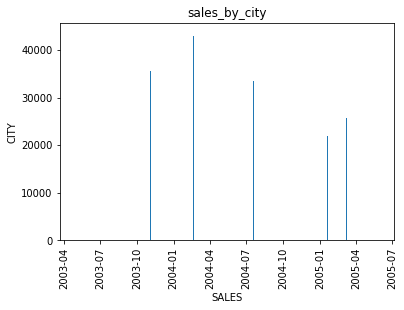

In [ ]:
# Bar chart of sales by month
plt.bar(SALES_BY_MONTH.index, SALES_BY_MONTH.values)
plt.xticks(rotation=90)
plt.xlabel('SALES')
plt.ylabel('CITY')
plt.title('sales_by_city')
plt.show()